In [6]:
# Import  libraries
import pandas as pd
import warnings
import seaborn as sns

In [7]:
# Suppress the specific warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like")

In [8]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

In [9]:
#1. Data collection

data = pd.read_csv("D:/661/midterm/supermarket_sales.csv")

In [10]:
data.shape

(1000, 17)

In [11]:
data.head

<bound method NDFrame.head of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle   

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [13]:
# 2. Descriptive Statistics
# Generate summary statistics for numerical columns
numerical_stats = data.describe()
print("\nSummary Statistics for Numerical Columns:")
print(numerical_stats)


Summary Statistics for Numerical Columns:
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25% 

In [14]:
#3. Data cleaning and Preprocessing

# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [15]:

# Check the data type of each column
data_types = data.dtypes
print("\nData Types of Each Column:")
print(data_types)


Data Types of Each Column:
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [16]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("\nNumber of Duplicate Rows:")
print(duplicate_rows)


Number of Duplicate Rows:
0


In [17]:
# Value counts for categorical columns (to understand the frequency distribution of categories)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(data[col].value_counts())


Value Counts for Invoice ID:
Invoice ID
849-09-3807    1
750-67-8428    1
226-31-3081    1
631-41-3108    1
123-19-1176    1
              ..
365-64-0515    1
529-56-3974    1
351-62-0822    1
692-92-5582    1
665-32-9167    1
Name: count, Length: 1000, dtype: int64

Value Counts for Branch:
Branch
A    340
B    332
C    328
Name: count, dtype: int64

Value Counts for City:
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Value Counts for Customer type:
Customer type
Member    501
Normal    499
Name: count, dtype: int64

Value Counts for Gender:
Gender
Female    501
Male      499
Name: count, dtype: int64

Value Counts for Product line:
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Value Counts for Date:
Date
2/7/2019     20
2/15/2019    19
3/2/2019     18
1/8/2019     18
3/14/201

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

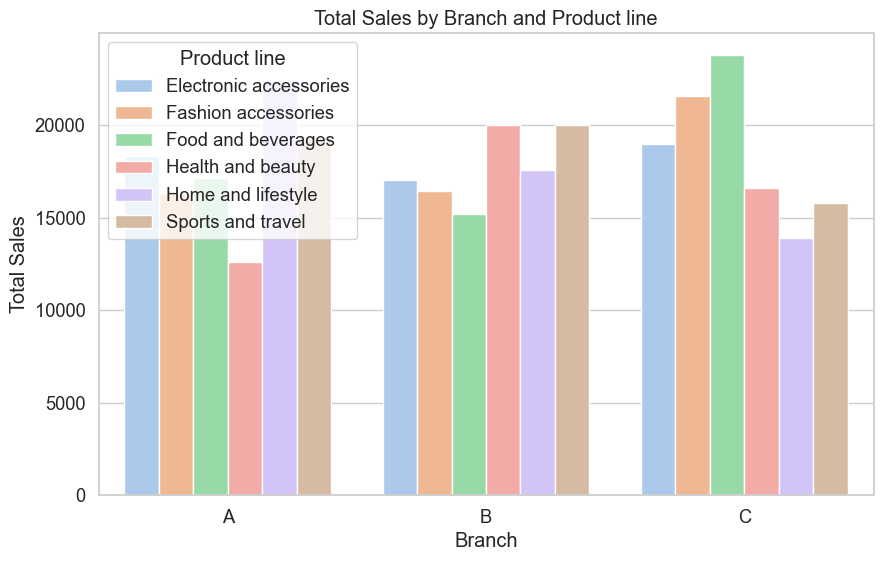

In [19]:
# 4. Data Visualization

#Sales performance1: This bar chart helps identify which branch generates the highest sales by product sales.
branch_sales = data.groupby(['Branch', 'Product line'])['Total'].sum().reset_index()

# Bar plot showing total sales by branch and product type
plt.figure(figsize=(10, 6))  # Optional: adjust the figure size
sns.barplot(data=branch_sales, x='Branch', y='Total', hue='Product line', palette='pastel')
plt.title("Total Sales by Branch and Product line")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.legend(title='Product line')
plt.show()

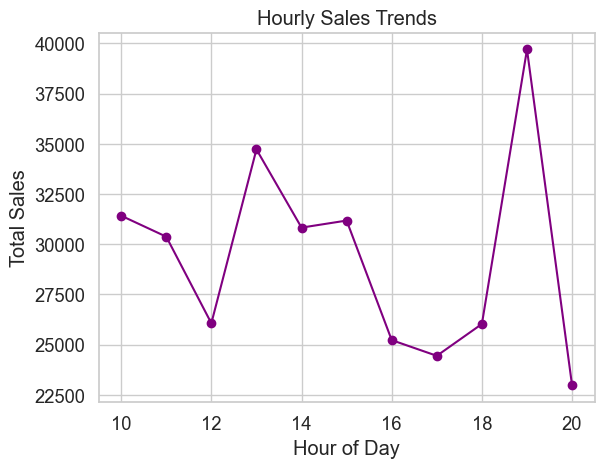

In [20]:
# Sales performance2: Explore peak hours and days by analyzing sales over different times of day and days of the week.
#  Convert time to datetime and extract hour for analysis.

# Convert 'Time' column to datetime, assuming it's in 'HH:MM' format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M')

# Extract the hour
data['Hour'] = data['Time'].dt.hour

# Plot sales by hour
hourly_sales = data.groupby('Hour')['Total'].sum()
hourly_sales.plot(kind='line', marker='o', color='purple')
plt.title("Hourly Sales Trends")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()



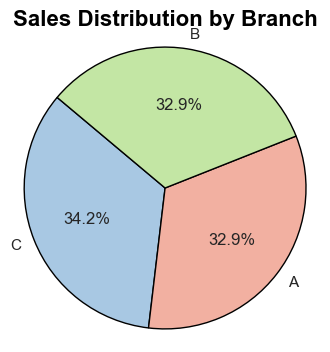

In [21]:
# Sales performance 3:
# pie chart that visually shows the percentage distribution of total sales for each branch
# Group by Branch and calculate total sales
branch_gross = data.groupby('Branch').agg(Total_Sales=('Total', 'sum')).reset_index()

# Sort the results to get the highest-grossing branches
branch_gross = branch_gross.sort_values(by='Total_Sales', ascending=False)

# Set a professional style using seaborn's default
sns.set(style='whitegrid')

# Define pastel colors
pastel_colors = ['#a8c8e3', '#f2b0a1', '#c3e6a4', '#f5e1a4', '#b0c4f6']

# Create a pie chart for the highest-grossing branches
plt.figure(figsize=(4, 4))
plt.pie(branch_gross['Total_Sales'],
        labels=branch_gross['Branch'],
        autopct='%1.1f%%',
        startangle=140,
        colors=pastel_colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'})  # Add black edges for contrast

# Add a professional title
plt.title("Sales Distribution by Branch", fontsize=16, fontweight='bold', color='black')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Display the plot
plt.show()

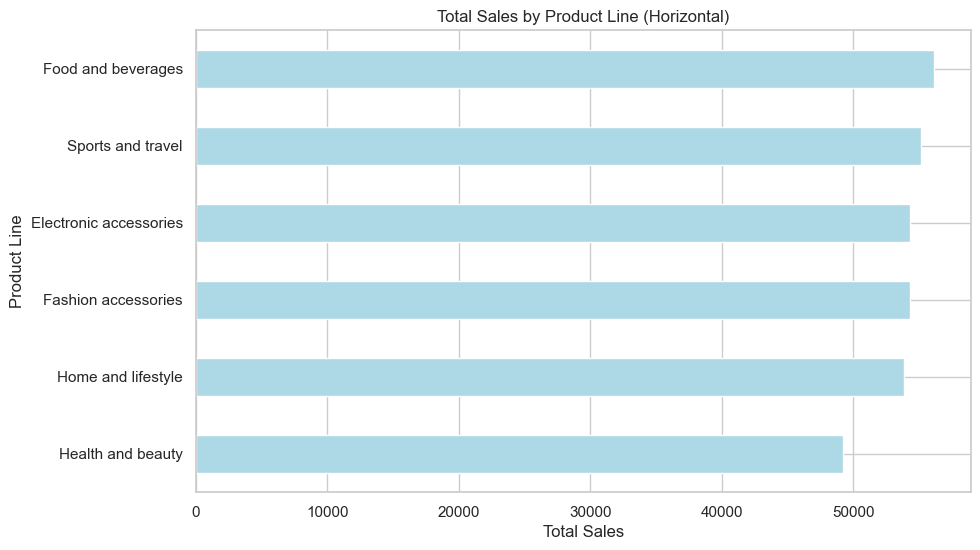

In [29]:
# Sales performance 4:
# Total sales by product line
# Identify the best-selling and least popular product lines to help with inventory and marketing strategies.
# Horizontal Bar Plot for Total Sales by Product Line
product_sales = data.groupby('Product line')['Total'].sum()
product_sales.sort_values().plot(kind='barh', color='lightblue', figsize=(10, 6))
plt.title("Total Sales by Product Line (Horizontal)")
plt.xlabel("Total Sales")
plt.ylabel("Product Line")
plt.show()

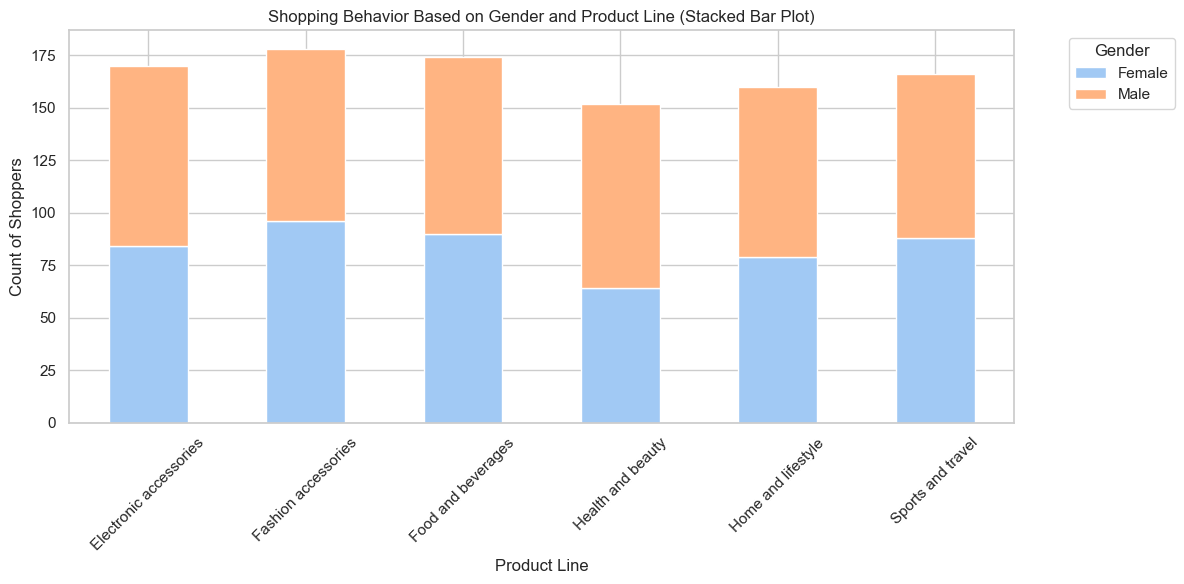

In [ ]:
# Sales performance5:
# Sales Trends Analysis - Distribution of Total Sales by Date

# Stacked Bar Plot for Customer Behavior Analysis
customer_behavior = data.groupby(['Product line', 'Gender']).size().unstack().fillna(0)

# Plotting stacked bar chart
customer_behavior.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette('pastel'))
plt.title("Shopping Behavior Based on Gender and Product Line (Stacked Bar Plot)")
plt.xlabel("Product Line")
plt.ylabel("Count of Shoppers")
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

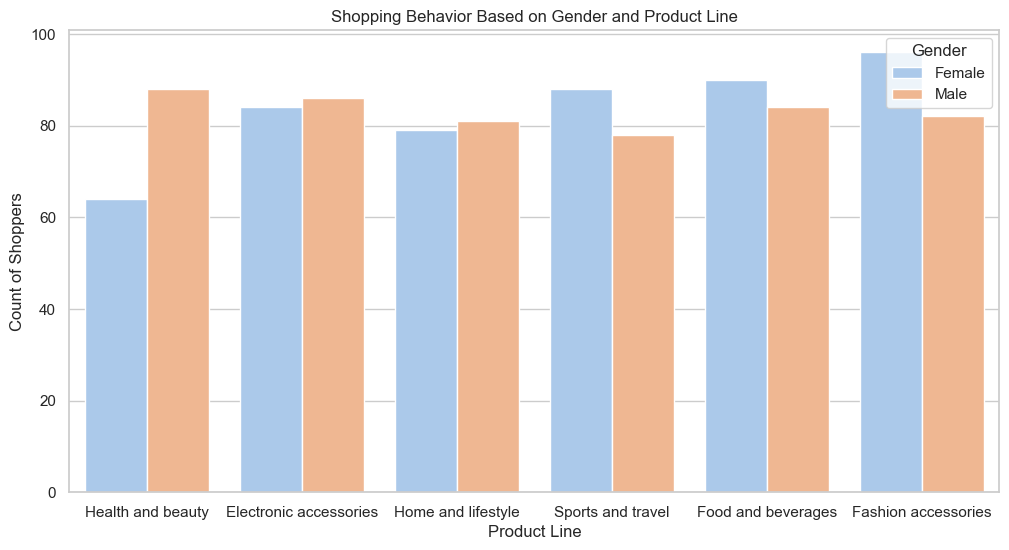

In [25]:
# 5. Customer Behavior Analysis

#Customer Behaviour1:
# Count plot showing shopping behavior based on Gender and Product Line
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Product line', hue='Gender', palette='pastel')
plt.title("Shopping Behavior Based on Gender and Product Line")
plt.xlabel("Product Line")
plt.ylabel("Count of Shoppers")
plt.legend(title='Gender')
plt.show()


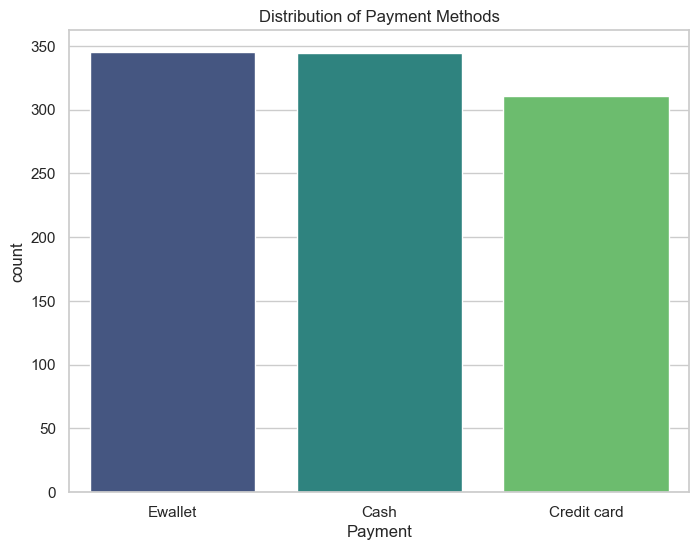

In [26]:
# 6. Payment Methods Analysis

# Payment Methods1:
# Popularity of Payment Methods
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Payment', palette='viridis', hue='Payment', legend=False)
plt.title("Distribution of Payment Methods")
plt.show()

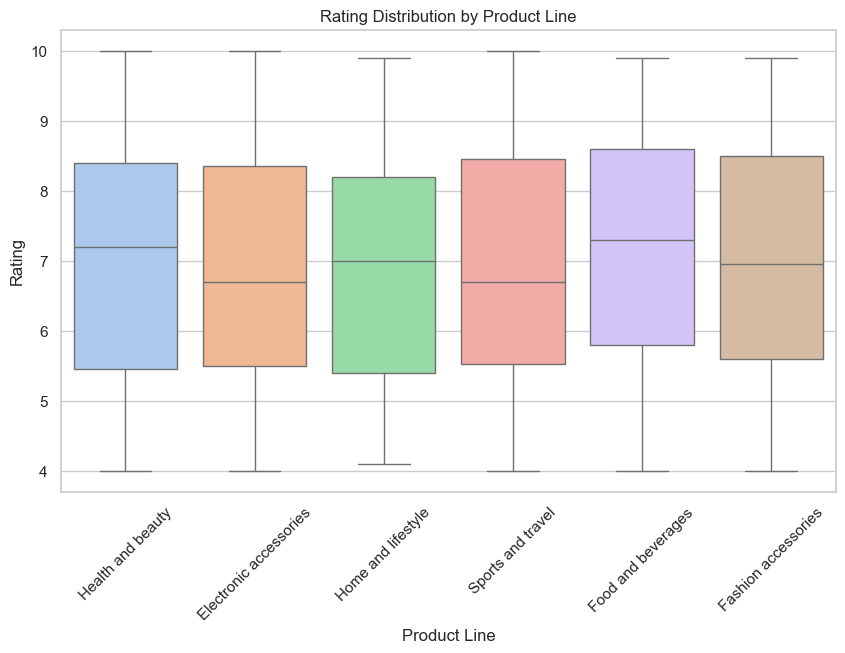

In [27]:
# 7. Product Analysis and Ratings

# Rating Distribution by Product Line (Box Plot)
# Compare the spread of ratings across different product lines

plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Rating', data=data, hue='Product line', palette='pastel', dodge=False)
plt.title("Rating Distribution by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


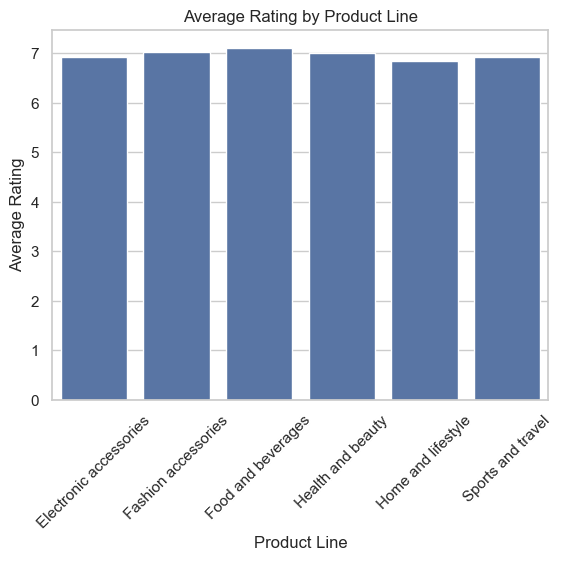

In [33]:
# Average Rating by Product Line (Bar Plot)
# Analyze customer satisfaction across different product lines by average rating
avg_rating_product_line = data.groupby('Product line')['Rating'].mean().reset_index()
sns.barplot(data=avg_rating_product_line, x='Product line', y='Rating')
plt.title("Average Rating by Product Line")
plt.xticks(rotation=45)
plt.xlabel("Product Line")
plt.ylabel("Average Rating")
plt.show()

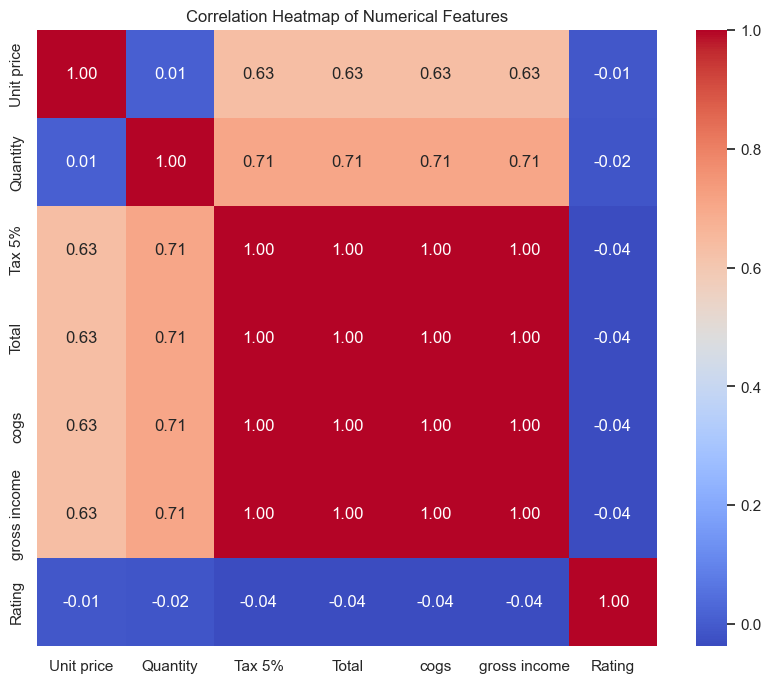

In [24]:
# 8. Correlation Analysis
# Correlation Heatmap of Numerical Features
# Explore relationships among numerical features for insights on dependencies
correlation_matrix = data[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

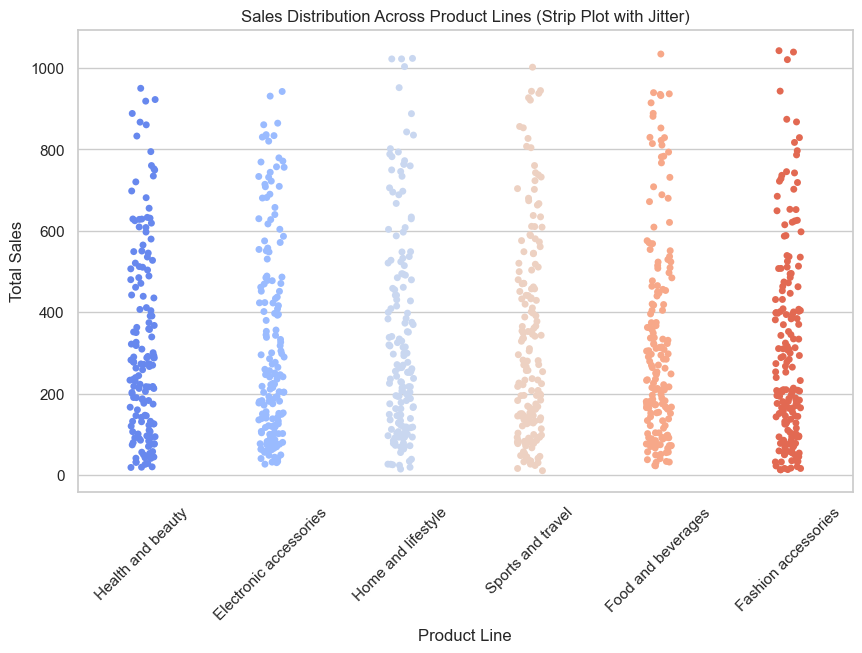

In [35]:
# 9. Sales Distribution Across Product Lines
# ------------------------------------------

# Sales distribution analysis for better understanding of sales spread across product lines
# Strip Plot for Sales Distribution Across Product Lines with Jitter
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x='Product line', y='Total', jitter=True, hue='Product line', palette='coolwarm', legend=False)
plt.xticks(rotation=45)
plt.title("Sales Distribution Across Product Lines (Strip Plot with Jitter)")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.show()

